## importação de bibliotecas

In [35]:
import pandas as pd
import seaborn as sns # Para visualização de dados estatísticos
import matplotlib.pyplot as plt # Para criação de gráficos
import openpyxl #Para salvar como formato excel

## Importação do dataframe
Análise inicial

In [2]:
data = pd.read_csv("D:\Pablinho & Nanda\Documents\Programação/finanças\data\Gastos_Set.csv")

In [3]:
data.head()

,DATA,DESCRIÇÃO,CATEGORIA,FORMA DE PAGAMENTO,PARCELAS RESTANTES,VALOR
0,NaN,Treino,PESSOAL,CARTÃO X,12,"152,91"
1,26/08,Netflix,STREAMING,CARTÃO Y,12,"55,9"
2,NaN,HBO,STREAMING,CARTÃO Y,12,"24,43"
3,NaN,ML,STREAMING,CARTÃO Y,12,9
4,NaN,Treino,PESSOAL,CARTÃO Y,12,0


In [4]:
data.tail()
# verifica-se muitos valores nulos nas linhas finais.

,DATA,DESCRIÇÃO,CATEGORIA,FORMA DE PAGAMENTO,PARCELAS RESTANTES,VALOR
111,NaN,NaN,-,-,1,NaN
112,NaN,NaN,-,-,1,NaN
113,NaN,NaN,-,-,1,NaN
114,NaN,NaN,-,-,1,NaN
115,NaN,NaN,-,-,1,NaN


In [5]:
data.shape
# 116 linhas e 6 colunas

(116, 6)

In [6]:
data.info()
# A quantidade de itens não nulos nas colunas é muito discrepante quando são comparadas entre si.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DATA                1 non-null      object
 1   DESCRIÇÃO           69 non-null     object
 2   CATEGORIA           116 non-null    object
 3   FORMA DE PAGAMENTO  116 non-null    object
 4   PARCELAS RESTANTES  116 non-null    int64 
 5   VALOR               69 non-null     object
dtypes: int64(1), object(5)
memory usage: 5.6+ KB


## Análise por coluna:

In [7]:
data.head(0)

,DATA,DESCRIÇÃO,CATEGORIA,FORMA DE PAGAMENTO,PARCELAS RESTANTES,VALOR


In [8]:
data['DATA'].value_counts()

DATA
26/08    1
Name: count, dtype: int64

In [9]:
data['DATA'].describe()
# Verifica-se apenas um resultado na coluna Data, logo ela está incompleta e poderá ser desconsiderada.

count         1
unique        1
top       26/08
freq          1
Name: DATA, dtype: object

In [10]:
data['DESCRIÇÃO'].describe()
# Verifica-se 69 valores na coluna DESCRIÇÃO com 61 únicos.

count         69
unique        61
top       Renner
freq           3
Name: DESCRIÇÃO, dtype: object

In [11]:
data['CATEGORIA'].describe()
# Verifica-se 116 valores, com 14 únicos e com o símbolo "-" aparecendo 47 vezes

count     116
unique     14
top         -
freq       47
Name: CATEGORIA, dtype: object

In [12]:
#Vamos verificar todos os valores da coluna CATEGORIA:
data['CATEGORIA'].value_counts()

CATEGORIA
-               47
LAZER           18
PESSOAL         11
LANCHES          9
MERCADO          7
COMPRAS          6
STREAMING        4
COMBUSTÍVEL      4
CASA             3
MILHAS           2
PADARIA          2
BIKE             1
CACHORRO         1
BELEZA/SAÚDE     1
Name: count, dtype: int64

In [13]:
data['FORMA DE PAGAMENTO'].describe()
# Verifica-se 116 valores, com 5 únicos e com o símbolo "-" aparecendo 47 vezes

count     116
unique      5
top         -
freq       47
Name: FORMA DE PAGAMENTO, dtype: object

In [14]:
# Vamos verificar todos os valores da coluna
data['FORMA DE PAGAMENTO'].value_counts()

FORMA DE PAGAMENTO
-           47
CARTÃO X    33
CARTÃO Y    32
CARTÃO Z     3
CARTÃO W     1
Name: count, dtype: int64

In [15]:
data['PARCELAS RESTANTES'].describe()
# Verifica-se 116 valores

count    116.000000
mean       1.887931
std        2.620228
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       12.000000
Name: PARCELAS RESTANTES, dtype: float64

In [16]:
data['PARCELAS RESTANTES'].value_counts()
# Temos muitos valores "1"

PARCELAS RESTANTES
1     95
2      8
12     6
8      2
5      2
3      2
4      1
Name: count, dtype: int64

In [17]:
data['VALOR'].describe()
# 69 valores e 67 únicos

count     69
unique    67
top       55
freq       2
Name: VALOR, dtype: object

In [18]:
data['VALOR'] = data['VALOR'].str.replace(',', '.').astype(float)
data['VALOR'] = pd.to_numeric(data['VALOR'])
data['VALOR']

0      152.91
1       55.90
2       24.43
3        9.00
4        0.00
        ...  
111       NaN
112       NaN
113       NaN
114       NaN
115       NaN
Name: VALOR, Length: 116, dtype: float64

## Limpeza dos dados

In [19]:
data.isnull().sum()
# Verifica-se que além de muitos valores nulos, tamos muitas colunas desorganizadas e desnecessárias

DATA                  115
DESCRIÇÃO              47
CATEGORIA               0
FORMA DE PAGAMENTO      0
PARCELAS RESTANTES      0
VALOR                  47
dtype: int64

In [20]:
# Buscando o primeiro nulo que aparece para retirar as linhas abaixo:
indice_primeiro_nulo = data['DESCRIÇÃO'].index[data['DESCRIÇÃO'].isnull()].tolist()[0]
indice_primeiro_nulo

69

In [21]:
# Buscando o primeiro valor nulo que aparece para retirar as linhas abaixo:
indice_primeiro_nulo = data['VALOR'].index[data['VALOR'].isnull()].tolist()[0]
indice_primeiro_nulo

69

In [22]:
# Retirei as colunas DATA e DESCRIÇÃO e as linhas desnecessárias:
data_clean=data.iloc[:indice_primeiro_nulo,2:6]
data_clean

,CATEGORIA,FORMA DE PAGAMENTO,PARCELAS RESTANTES,VALOR
0,PESSOAL,CARTÃO X,12,152.91
1,STREAMING,CARTÃO Y,12,55.90
2,STREAMING,CARTÃO Y,12,24.43
3,STREAMING,CARTÃO Y,12,9.00
4,PESSOAL,CARTÃO Y,12,0.00
...,...,...,...,...
64,LAZER,CARTÃO Y,1,24.97
65,LAZER,CARTÃO Y,1,21.99
66,LAZER,CARTÃO Y,1,39.00
67,LAZER,CARTÃO Y,1,17.99


## Criação de gráficos:

In [34]:
# Clonando o dataframe:
df=data_clean.copy()
df.head(0)

,CATEGORIA,FORMA DE PAGAMENTO,PARCELAS RESTANTES,VALOR


In [24]:
# Usando o método groupby para agrupar os dados por categoria e, em seguida, calculando a soma dos valores
valor_categoria = df.groupby('CATEGORIA')['VALOR'].sum().reset_index()

valor_categoria

,CATEGORIA,VALOR
0,BELEZA/SAÚDE,47.49
1,BIKE,42.24
2,CACHORRO,76.00
3,CASA,445.68
4,COMBUSTÍVEL,833.74
5,COMPRAS,566.73
6,LANCHES,275.22
7,LAZER,791.49
8,MERCADO,744.98
9,MILHAS,227.50


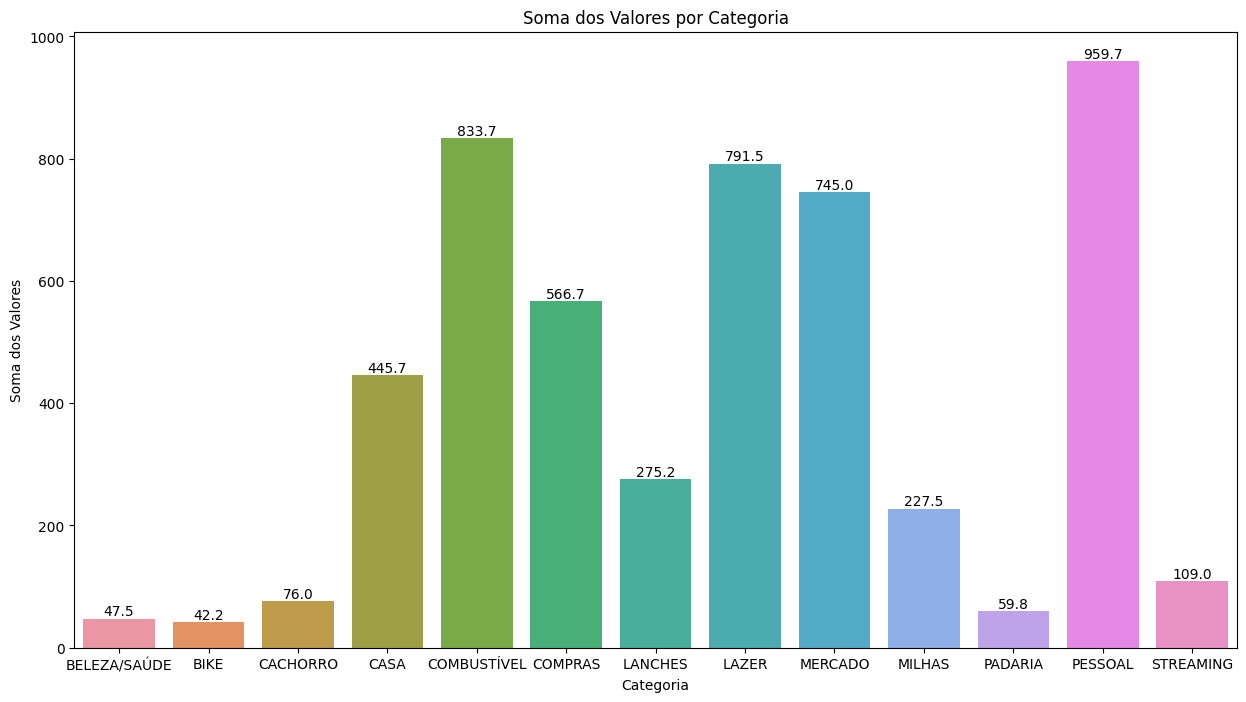

In [25]:
plt.figure(figsize=(15, 8))  # Tamanho do gráfico
sns.barplot(x='CATEGORIA', y='VALOR', data=valor_categoria)

# Adicionando rótulos aos eixos e ao gráfico
plt.xlabel('Categoria')
plt.ylabel('Soma dos Valores')
plt.title('Soma dos Valores por Categoria')

# Apresentação do valor acima de cada coluna:
for index, row in valor_categoria.iterrows():
    plt.annotate(f'{row["VALOR"]:.1f}', (index, row["VALOR"]), ha='center', va='bottom')

# Mostrando o gráfico
plt.show()

In [26]:
# Usando o método groupby para agrupar os dados por categoria e, em seguida, calculando a soma dos valores
valor_formadepagamento = df.groupby('FORMA DE PAGAMENTO')['VALOR'].sum().reset_index()

valor_formadepagamento

,FORMA DE PAGAMENTO,VALOR
0,CARTÃO W,60.00
1,CARTÃO X,2429.55
2,CARTÃO Y,2392.47
3,CARTÃO Z,297.48


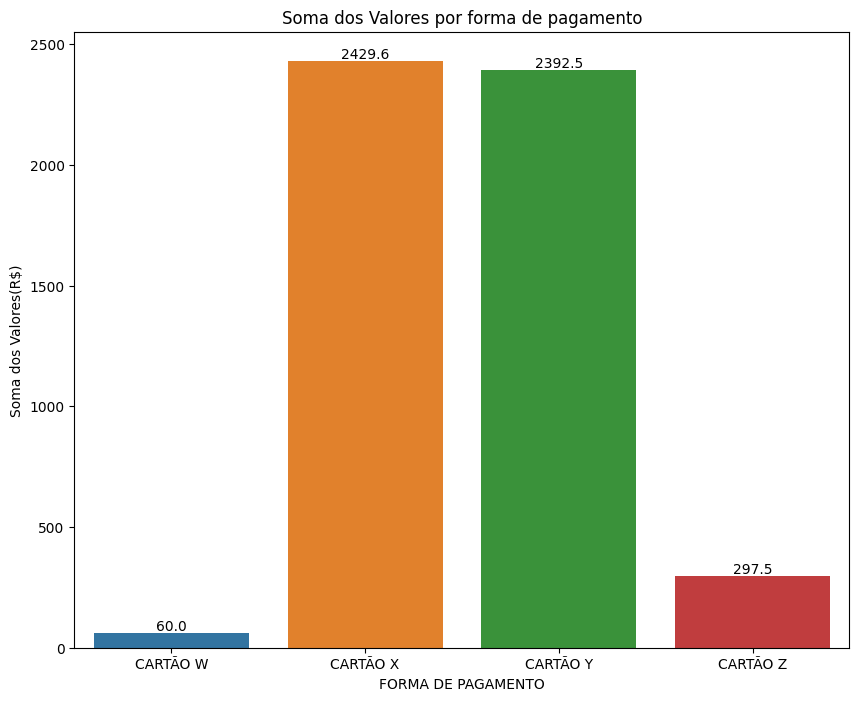

In [27]:
plt.figure(figsize=(10, 8))  # Tamanho do gráfico
sns.barplot(x='FORMA DE PAGAMENTO', y='VALOR', data= valor_formadepagamento)

# Adicionando rótulos aos eixos e ao gráfico
plt.xlabel('FORMA DE PAGAMENTO')
plt.ylabel('Soma dos Valores(R$)')
plt.title('Soma dos Valores por forma de pagamento')

# Apresentação do valor acima de cada coluna:
for index, row in valor_formadepagamento.iterrows():
    plt.annotate(f'{row["VALOR"]:.1f}', (index, row["VALOR"]), ha='center', va='bottom')

# Mostrando o gráfico
plt.show()

In [28]:
# Valor total devido
parcelas=df['PARCELAS RESTANTES']
valor=df['VALOR']
len(valor)
for i in range(len(valor)):
    df.loc[i,'somatorio']=parcelas[i]*valor[i]
print('Valor total devido: R$ '+str(round(df['somatorio'].sum(),2)))


Valor total devido: R$ 12398.53


In [29]:
cores={'CARTÃO X' : 'BLUE','CARTÃO Y' : 'GREEN','CARTÃO Z' : 'BLACK','CARTÃO W' : 'RED' }
df['cor']=df['FORMA DE PAGAMENTO'].map(cores)
df

,CATEGORIA,FORMA DE PAGAMENTO,PARCELAS RESTANTES,VALOR,somatorio,cor
0,PESSOAL,CARTÃO X,12,152.91,1834.92,BLUE
1,STREAMING,CARTÃO Y,12,55.90,670.80,GREEN
2,STREAMING,CARTÃO Y,12,24.43,293.16,GREEN
3,STREAMING,CARTÃO Y,12,9.00,108.00,GREEN
4,PESSOAL,CARTÃO Y,12,0.00,0.00,GREEN
...,...,...,...,...,...,...
64,LAZER,CARTÃO Y,1,24.97,24.97,GREEN
65,LAZER,CARTÃO Y,1,21.99,21.99,GREEN
66,LAZER,CARTÃO Y,1,39.00,39.00,GREEN
67,LAZER,CARTÃO Y,1,17.99,17.99,GREEN


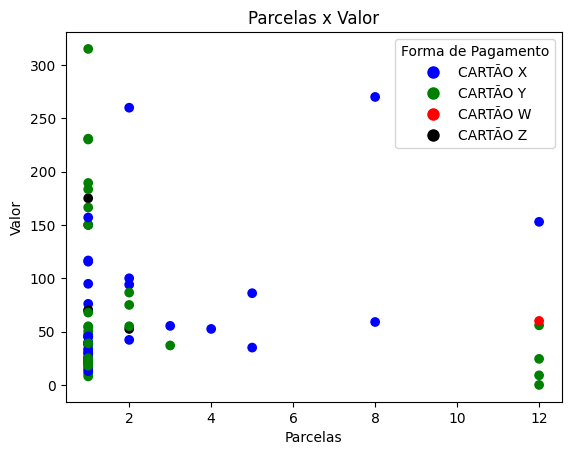

In [30]:
plt.scatter(parcelas, valor, c=df['cor'])
plt.title('Parcelas x Valor')
plt.xlabel('Parcelas')
plt.ylabel('Valor')
# Adicione a legenda ao gráfico automaticamente usando as cores e rótulos do DataFrame
legend_labels = df[['FORMA DE PAGAMENTO', 'cor']].drop_duplicates()
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=row['FORMA DE PAGAMENTO'],markerfacecolor=row['cor'], markersize=10)for _, row in legend_labels.iterrows()],title='Forma de Pagamento')
plt.show()

In [31]:
# Usando o método groupby para agrupar os dados por categoria e, em seguida, calculando a soma dos valores
total_formadepag = df.groupby('FORMA DE PAGAMENTO')['somatorio'].sum().reset_index()

total_formadepag

,FORMA DE PAGAMENTO,somatorio
0,CARTÃO W,720.00
1,CARTÃO X,7662.90
2,CARTÃO Y,3665.66
3,CARTÃO Z,349.97


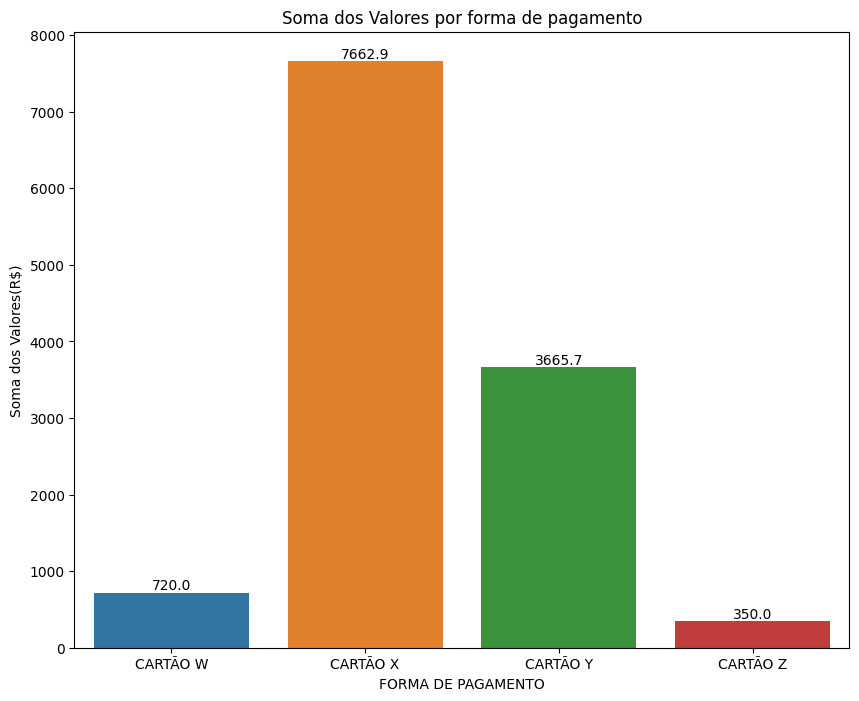

In [32]:
plt.figure(figsize=(10, 8))  # Tamanho do gráfico
sns.barplot(x='FORMA DE PAGAMENTO', y='somatorio', data= total_formadepag)

# Adicionando rótulos aos eixos e ao gráfico
plt.xlabel('FORMA DE PAGAMENTO')
plt.ylabel('Soma dos Valores(R$)')
plt.title('Soma dos Valores por forma de pagamento')

# Apresentação do valor acima de cada coluna:
for index, row in total_formadepag.iterrows():
    plt.annotate(f'{row["somatorio"]:.1f}', (index, row["somatorio"]), ha='center', va='bottom')

# Mostrando o gráfico
plt.show()

In [33]:
data_clean

,CATEGORIA,FORMA DE PAGAMENTO,PARCELAS RESTANTES,VALOR
0,PESSOAL,CARTÃO X,12,152.91
1,STREAMING,CARTÃO Y,12,55.90
2,STREAMING,CARTÃO Y,12,24.43
3,STREAMING,CARTÃO Y,12,9.00
4,PESSOAL,CARTÃO Y,12,0.00
...,...,...,...,...
64,LAZER,CARTÃO Y,1,24.97
65,LAZER,CARTÃO Y,1,21.99
66,LAZER,CARTÃO Y,1,39.00
67,LAZER,CARTÃO Y,1,17.99


In [36]:
data_clean.to_excel('data/Gastos Set.xlsx', index = False, engine='openpyxl')